# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [75]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [7]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column. 
- First, we need to **replace the ? with np.nan**.

In [8]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

### **Question 1:** 
- **Check the summary statistics of the data (use the describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [10]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:________**
<br>-The mean for mpg is 23.5 with a minimum of 9 and a max of 46.6.
<br>-Cylinders range from 3 to 8, with most having around 5. 
<br>-Engine displacement/size has a large range from 68 to 455 cubic inches, although averaging around 193 cubic inches. This also has a large standard deviation of around 100.
<br>-Horsepower range from 46 to 230, with an average around 104.
<br>-Weight has a large range also, from 1613 to 5140.
<br>-Acceleration has a smaller range, with the bulk falling below 17 sec to get to 60 mph.
<br>-Vehicle years range between 70-82.

### **Let's check the distribution and outliers for each column in the data**

### **Question 2:**
- **Create histograms to check the distribution of all the variables (use .hist() attribute) (2 Marks)**
- **Create boxplots to visualize the outliers for all the variables (use sns.boxplot()) (2 Marks)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


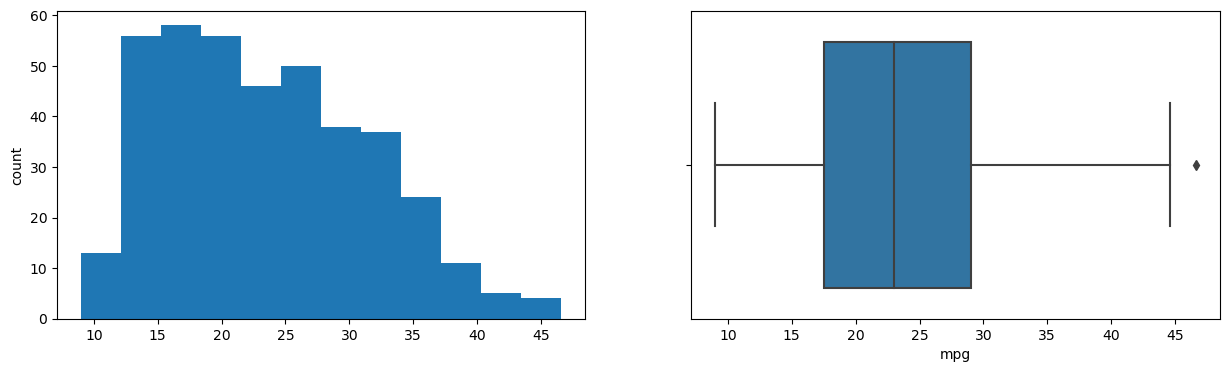

cylinders
Skew : 0.53


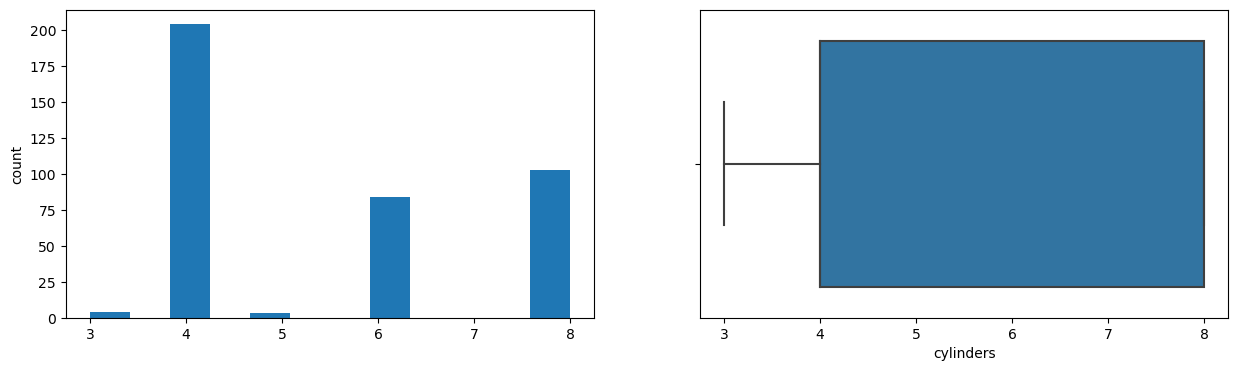

displacement
Skew : 0.72


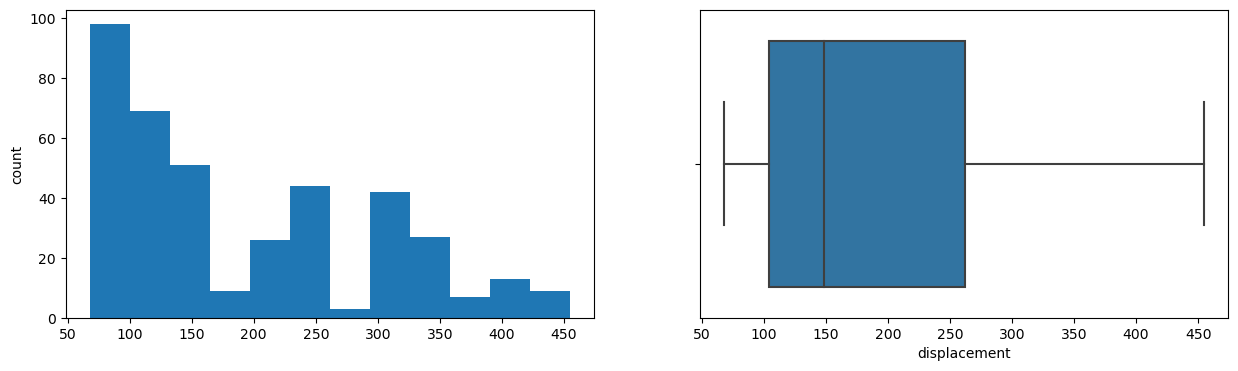

horsepower
Skew : 1.11


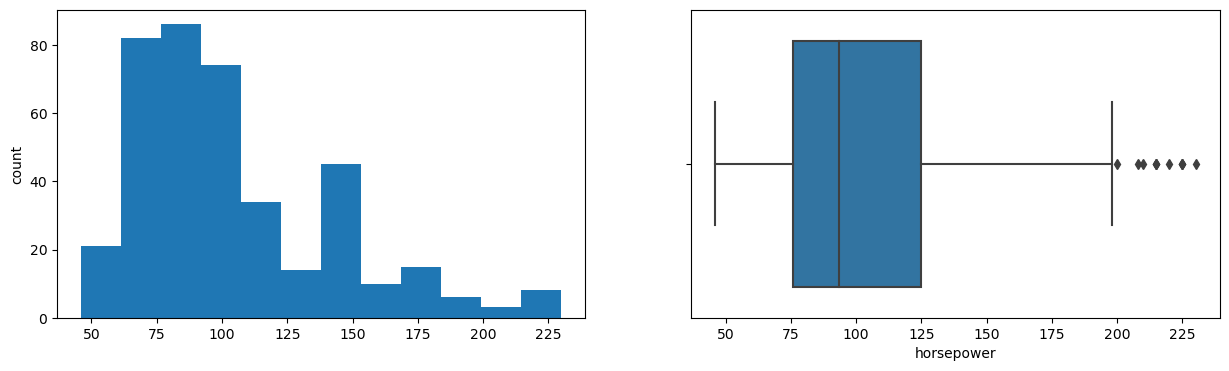

weight
Skew : 0.53


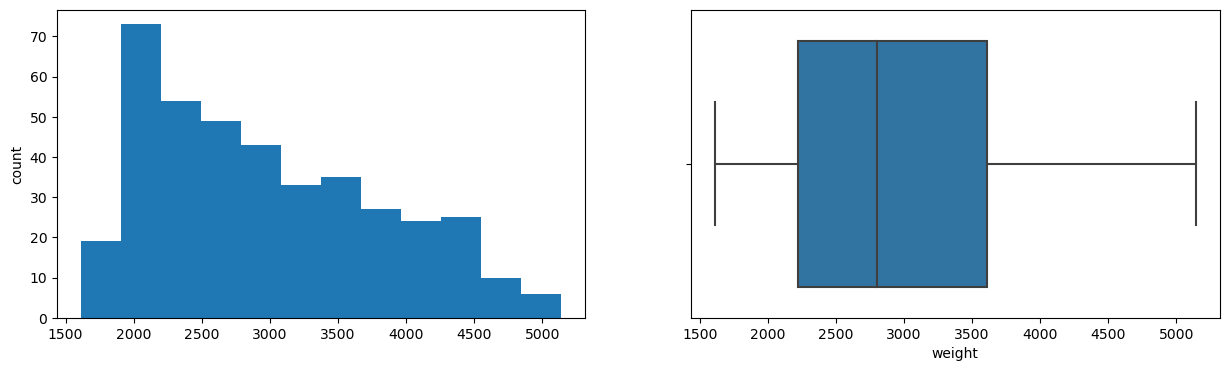

acceleration
Skew : 0.28


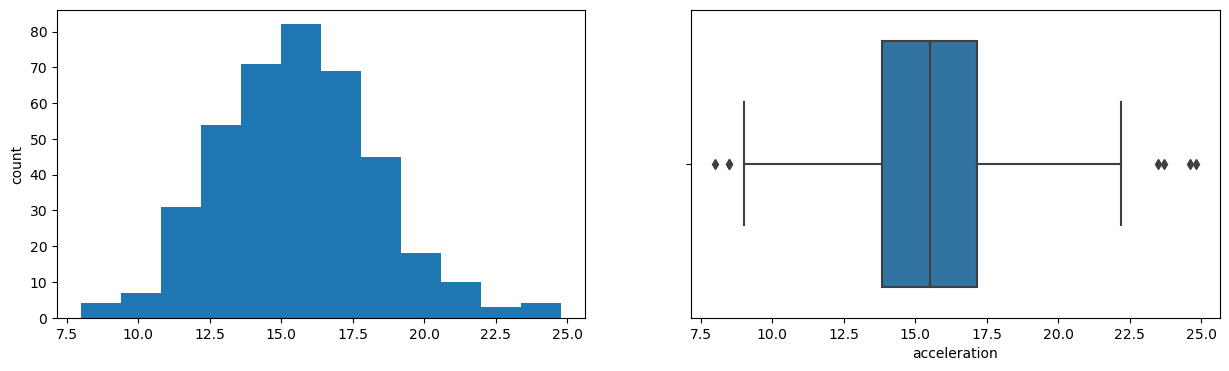

model year
Skew : 0.01


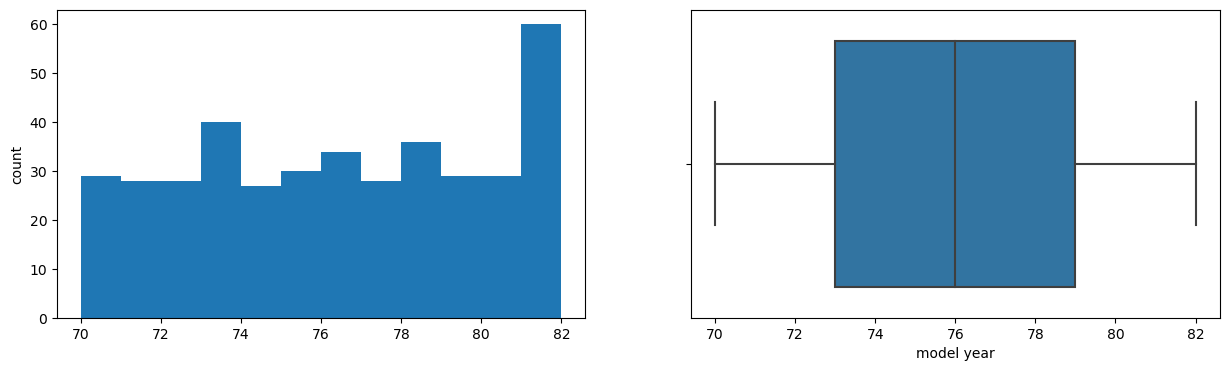

In [11]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 12, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:_____________**
<br>-Mpg is right skewed/positively skewed. The bulk of the data is between 17 and 30, with greater outliers on the right. These outliers may be hybrid vehicles.
<br>-Cylinders show zero values at 3,5,and 7. Typically vehicles have 4,6,or 8 cylinders, so this isn't surprising. Most vehicles have 4 cylinders. The boxplot shows the range from 4-8 but can be misleading if you were only using boxplot- since there are no values at 5 and 7. Having the histogram helps really see this data. 
<br>-Displacement/engine size is positively skewed/right skewed. With the median falling around 150, the bulk of the data ranges between 100 and 260 cu in.
<br>-Horsepower is also right skewed/positively skewed. The majority of the vehicles have a horsepower between 75 and 125.
<br>-Vehicle weight is also right skewed/positively skewed. The bulk of the weights are between 2300 and 3700 lbs. and the bulk of the outliers are to the right.
<br>-Acceleration has a normal distribution, with a peak between 15-16 seconds.
<br>-Model years have a fairly uniform distribution at approx 30 vehicles, with the expection of 81-82 which has about 60 vehicles.

### **Checking the correlation**

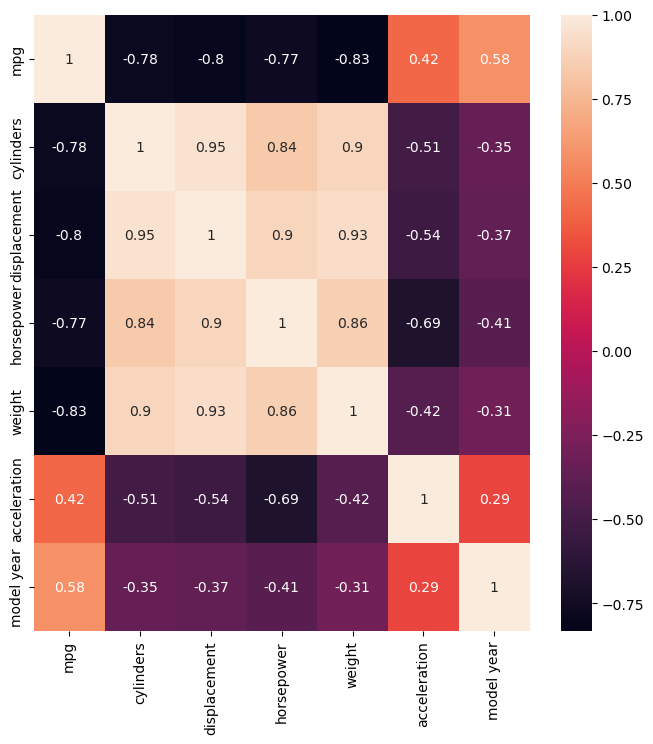

In [62]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [63]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [64]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Question 3:**

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data (2 Marks)**
- **Write your observations on the variance explained by the principal components (2 Marks)**

In [65]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n,random_state=1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

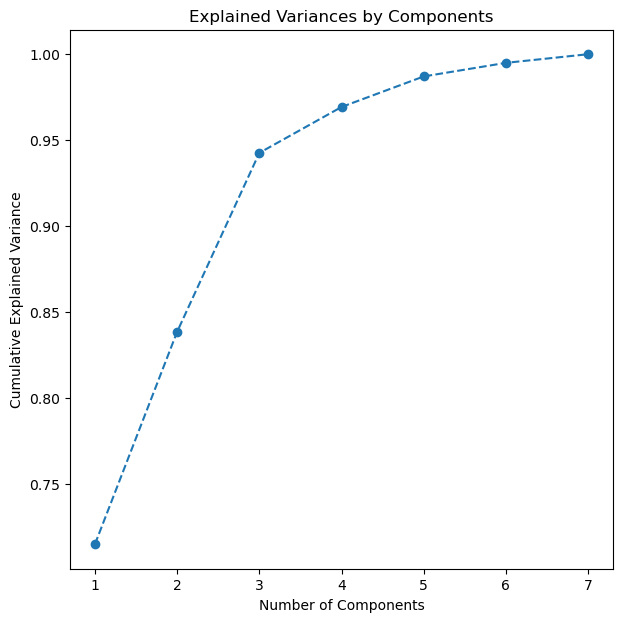

In [66]:
# Visualize the explained variance by individual components
plt.figure(figsize = (7, 7))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [67]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:___________________**
<br>Of the 7 features, we can explain 90% variance within 3 principal components, reducing dimensionality by 57%. The first 3 principal components explain 43% of the original variance.

In [68]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **Question 4: Interpret the coefficients of the first three principal components from the below DataFrame (4 Marks)**

In [69]:
def color_high(val):
    if val <= -0.40:
        return 'background: orange'
    
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:__________________**
<br> PC1 holds positive loadings for cylinders, displacement, horsepower and weight, showing those variables associated with the structure of engines which is related to the size of the vehicle. PC1 also holds a negative loading with mpg.
<br> PC2 has a strong negative loading with the vehicle year.
<br> PC 3 has a strong positive loading with acceleration.

#### We can also visualize the data in 2 dimensions using the first two principal components 

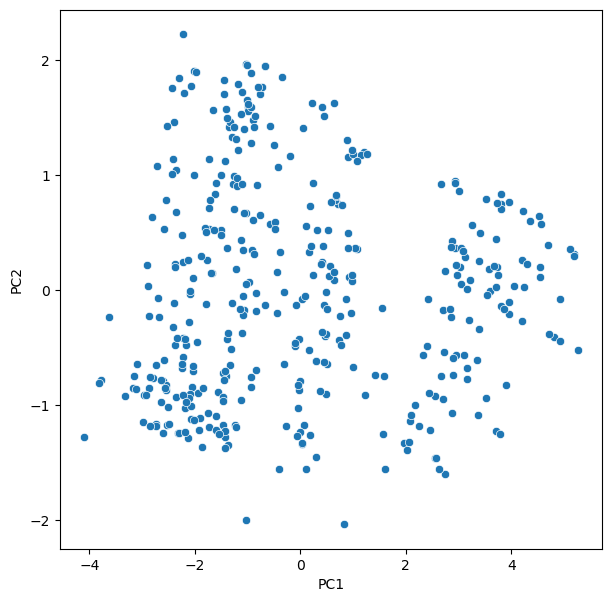

In [70]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

### **Question 5:** 

- **Create a scatter plot for the first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**
- **Hint:** concatenate the DataFrames 'data_pca1' and 'data' on axis = 1

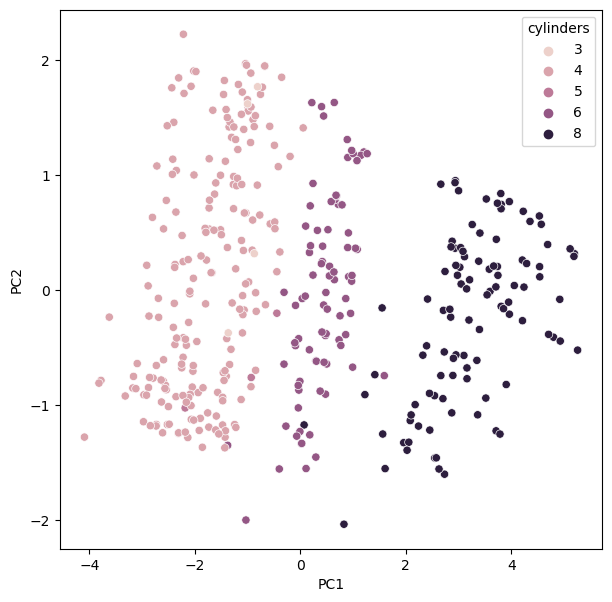

In [72]:

df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

# Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

sns.scatterplot(data=df_concat,x=0,y=1,hue='cylinders')

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**
<br> As PC1 increases, the number of cylinders increases.
<br> PC2 does not seem to have much effect on cylinders; the plot shows that PC2 has all numbers of cylinders spreadout throughout PC2's range, from -2 to 2.
<br> This corresponds to what the PCA table also shows, with PC2 having a slight negative association with cylinders.

## t-SNE

### **Question 6:** 
- **Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1) (3 Marks)**
- **Write your observations (2 Marks)**   

In [105]:
tsne = TSNE(n_components=2,random_state=1,perplexity=25)           # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)    # Fit and transform t-SNE function on the scaled data

In [106]:
data_tsne.shape

(398, 2)

In [107]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [108]:
data_tsne.head()

,Component 1,Component 2
0,-9.963583,-39.223808
1,-11.943252,-40.302040
2,-10.805838,-39.975838
3,-10.872711,-39.296124
4,-10.234601,-39.994930


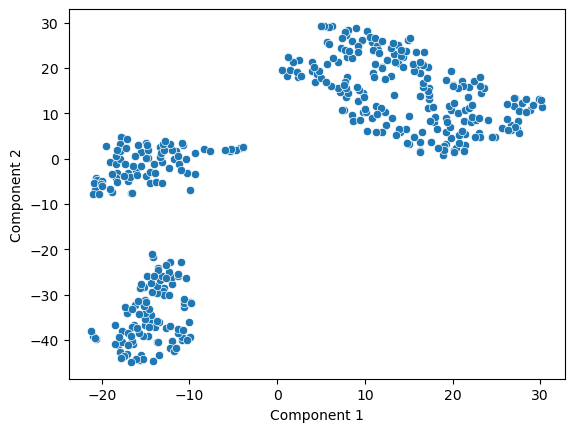

In [109]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

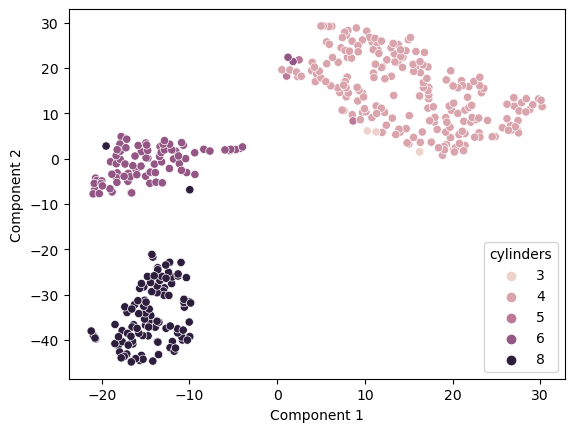

In [110]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:**
<br> Cylinders sort into three primary groups (3-4 cylinders, 5-6 cylinders, and 8 cylinders).
<br> Cars with 3-4 cylinders are clustered around within a range in Component 1 and 2 from 10-30.
<br> Cars with 5-6 cylinders range in Component 1 from 0 to -20 and in Component 2 from -10 to approx. 8.
<br> Cars with 8 cylinders are negatively clustered for both Component 1 and 2 with ranges from -10 to -20 for both.

In [111]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    
    second_component = x['Component 2']
    
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    
    else: 
        return 'group_3'

In [112]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

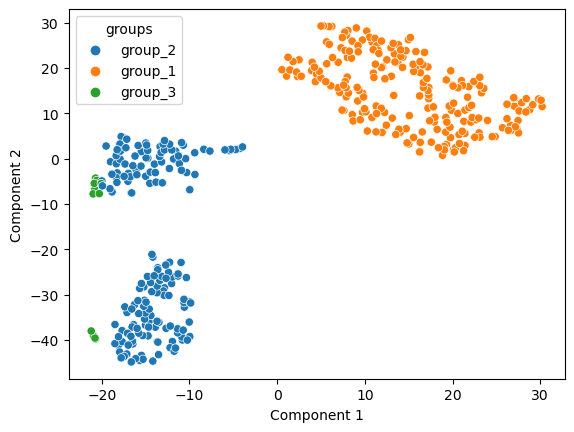

In [113]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [114]:
data['groups'] = data_tsne['groups'] 

### **Question 7:** 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (3 Marks)**

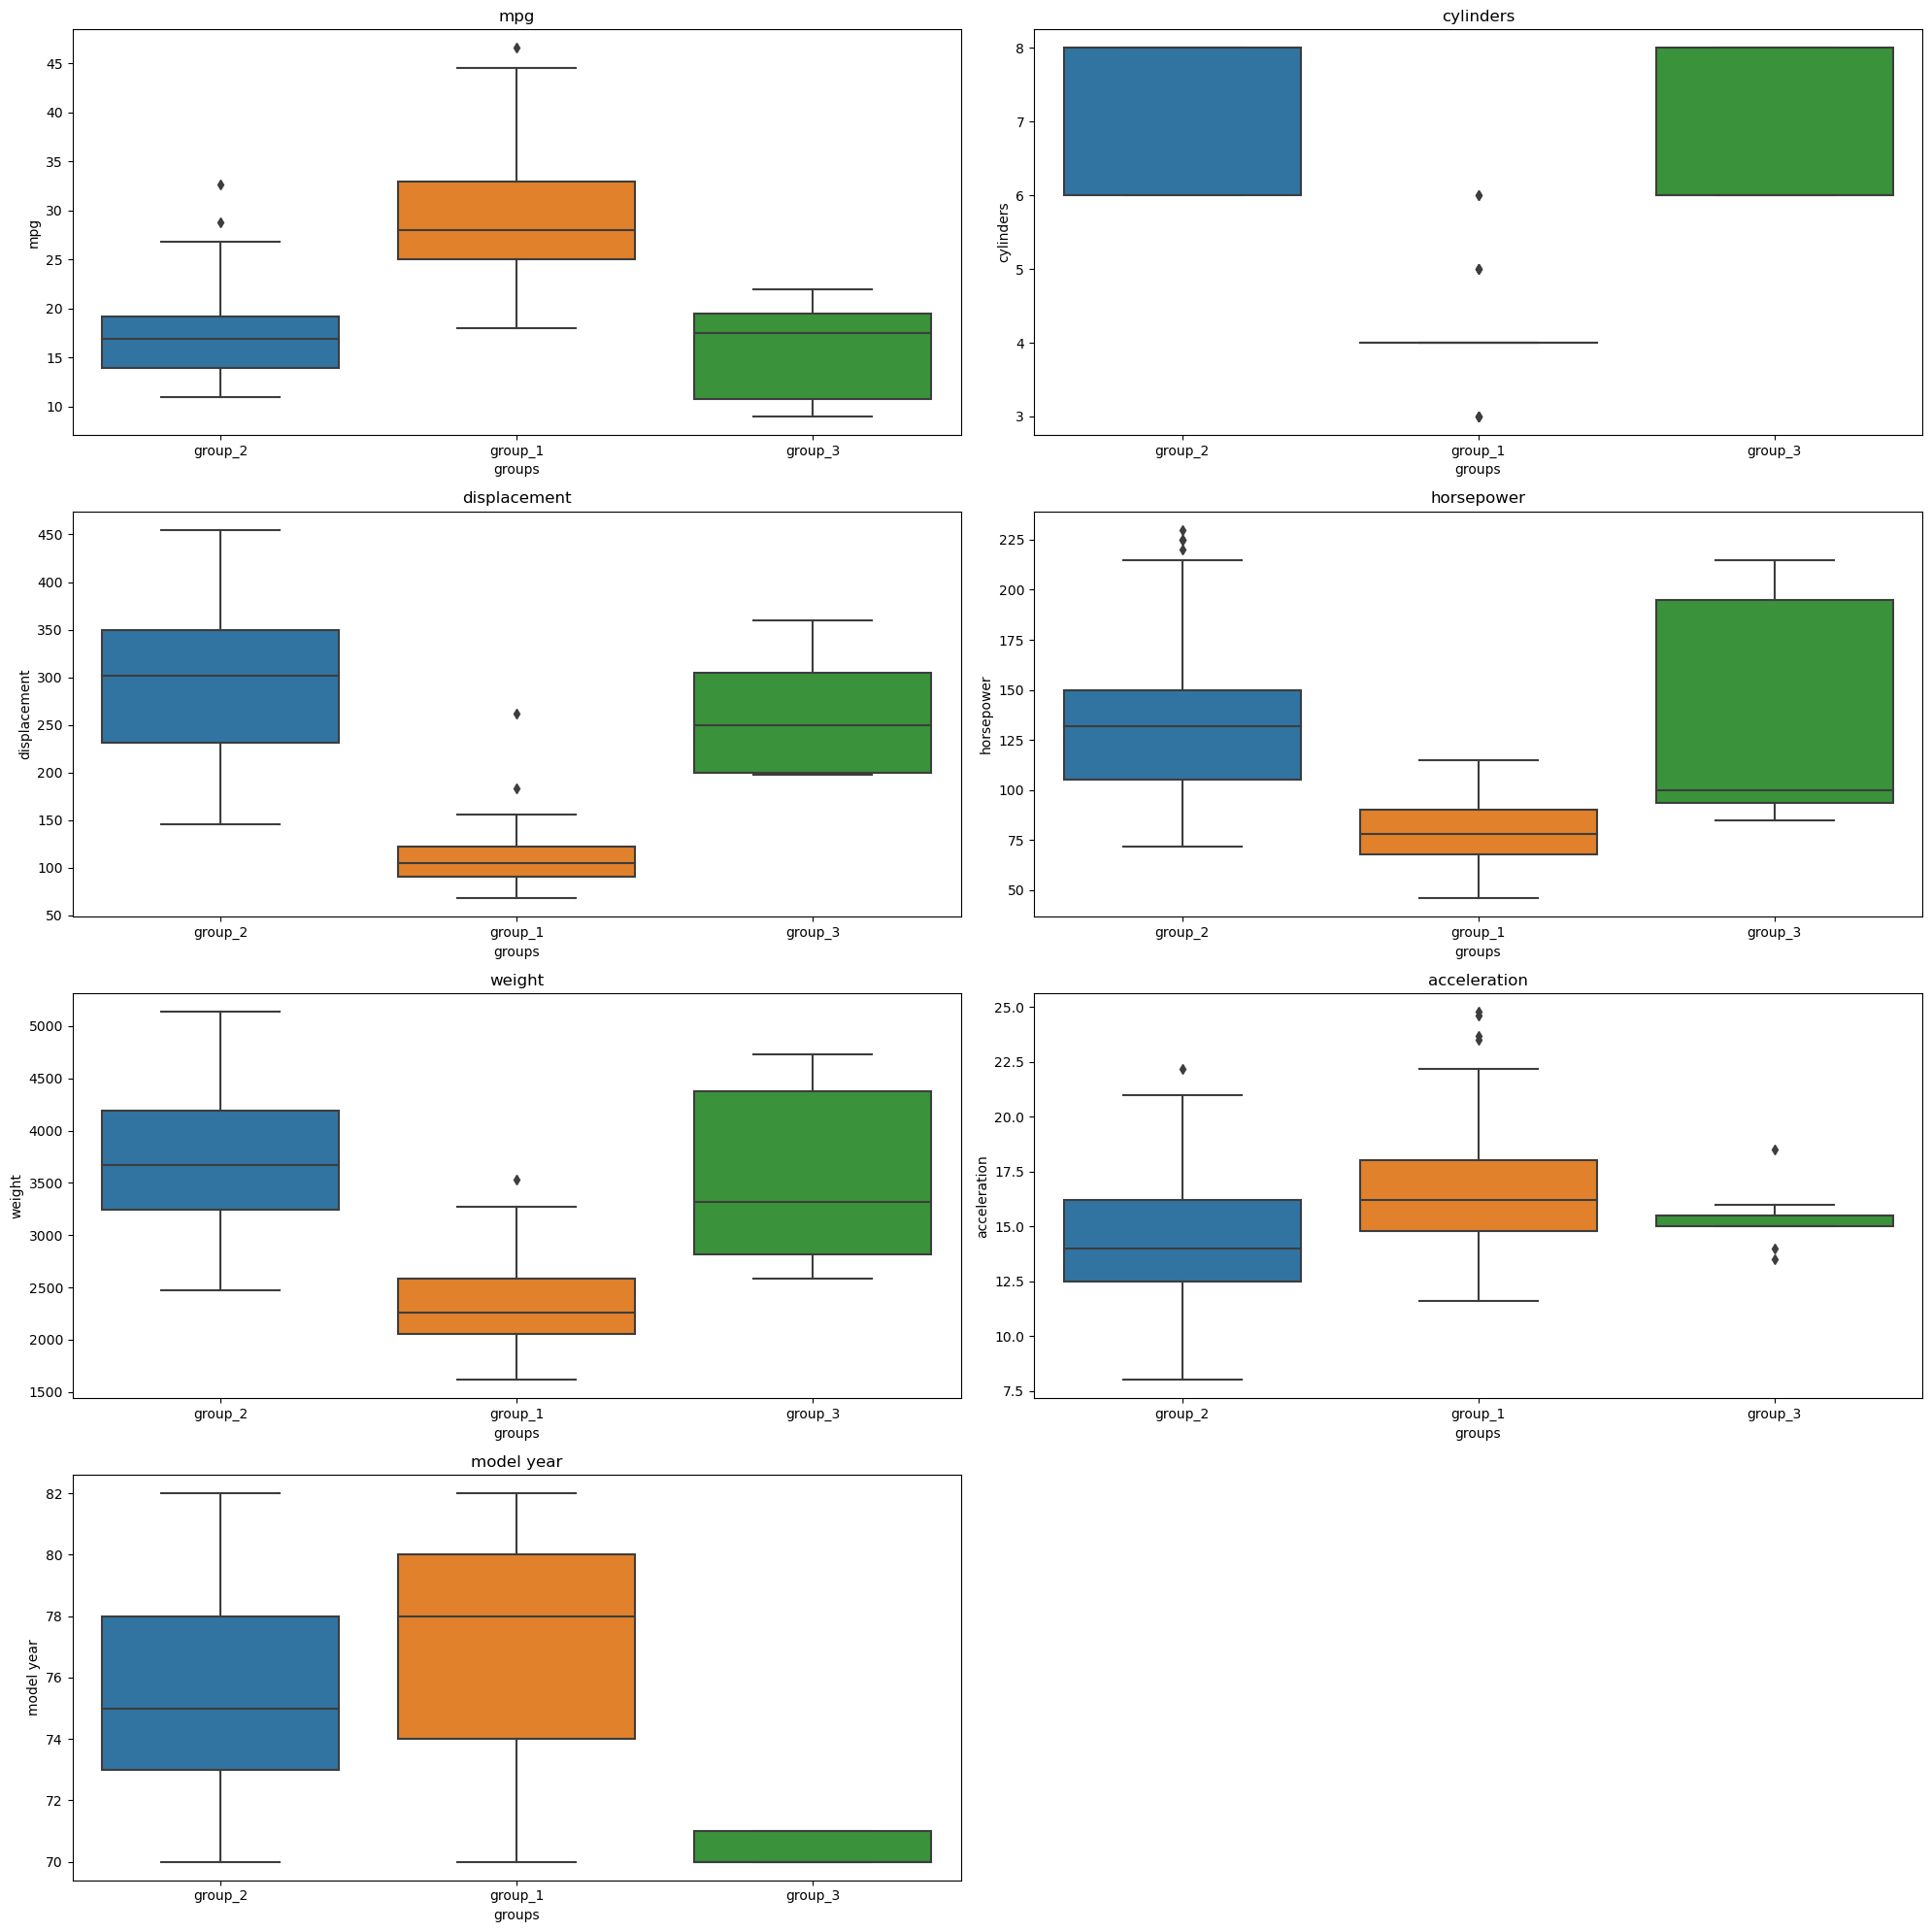

In [115]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col): 
    if i == 7:
        break
    
    plt.subplot(4, 2, i + 1)
    
    sns.boxplot(x=data['groups'],y=data[variable])     # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:___________**
Group 1 has the newer vehicles (most are years 1975-80) and they have the highest mpg, moderate acceleration, lighter in weight, very low displacement/smallest engine sizes, and least horsepower. This is also showing a flat "box" at 4 cylinders.
Group 2 has the cars from apprx 1973 to 78. These have a mpg under 20 and engine size has increased over Group 1 and ranges 240 to 350.Vehicle weight has also increased, assuming this corresponds to the larger engines. The acceleration for this group is the lowest, ranging between 12.5 to 16.This group has the highest number of cylinders as well.
Group 3 has the oldest vehicles, a large range in vehicle weight, The horsepower for these vehicles is lower, averaging around 100, but has the largest range in horsepower. Displacement is moderate, and mpg is low similar to Group 1. Acceleration has almost no range, but lies around 15.